# Real Estate Data - Regression
Given a dataset with properties of various real estate sales such as number of bedrooms, sq ft, number of bathrooms, no of schools around etc, we have to predict the estimated value of the transaction for an investing company.

### Imports

In [1]:
#Default Imports
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#Models
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#Building everything
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Evaluation
from sklearn.metrics import r2_score, mean_absolute_error

#Saving the model
import pickle

### Exploratory Data Analysis

In [2]:
df = pd.read_csv('real_estate_data.csv')

In [3]:
df.shape

(1883, 26)

Looking at the data types of each column

In [4]:
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [5]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


All the categorical variables

In [6]:
df.dtypes[df.dtypes == object]

property_type     object
exterior_walls    object
roof              object
dtype: object

Histograms of all numerical values

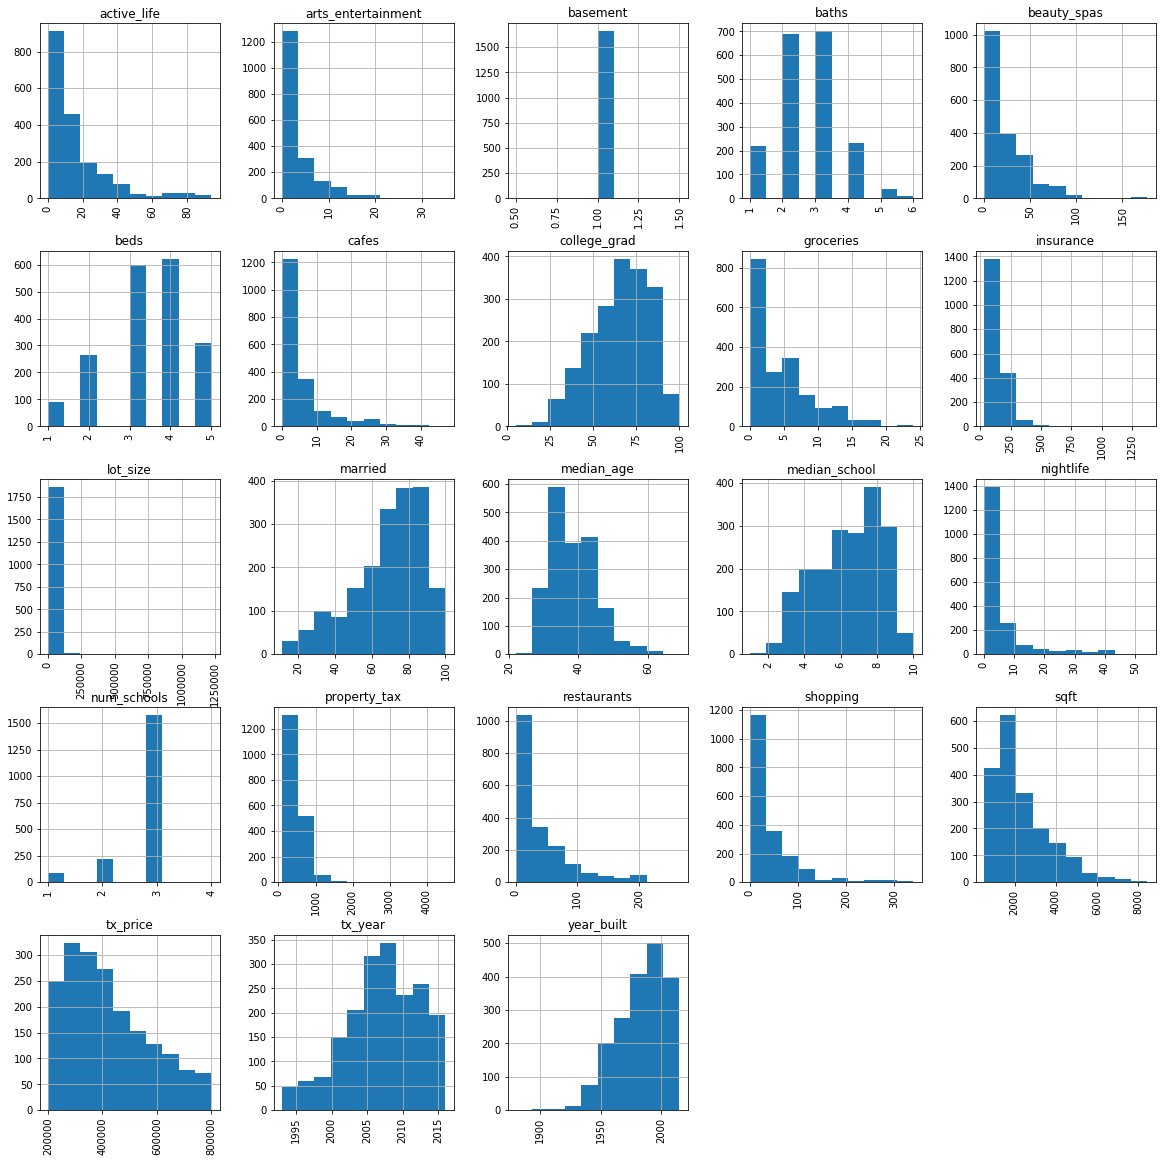

In [7]:
# Plot histogram grid
df.hist(figsize= (20, 20), xrot= 90)
# Clear the text "residue"
plt.show()

The value of basement and lot sizes stand out as sole values


Looking into this

In [8]:
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


Lot size is fine
But basement either has NaNs or 1's, might be a categorical feature.

A small description of the categorical variables as well

In [9]:
df.describe(include= object)

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


Plotting bar graphs of each categorical variable against their frequency

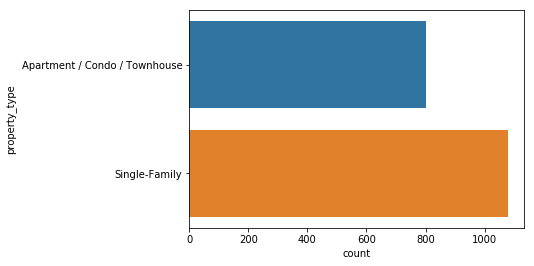

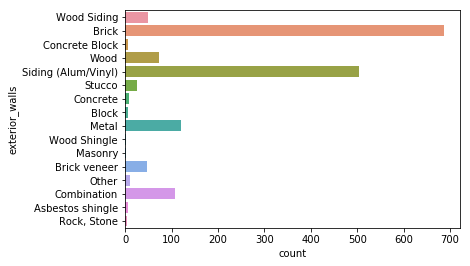

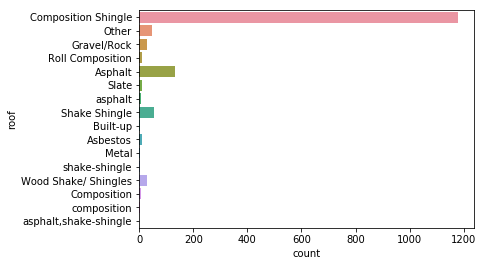

In [10]:
for feature in df.dtypes[df.dtypes == object].index:
    sns.countplot(y = feature, data = df)
    plt.show()

In depth description of all categorical features

In [11]:
for feature in df.dtypes[df.dtypes == object].index:
    print(feature)
    display(df.groupby(feature).describe())

property_type


active_life                                  \
                                    count       mean        std  min  25%   
property_type                                                               
Apartment / Condo / Townhouse       803.0  22.410959  21.058178  0.0  9.0   
Single-Family                      1080.0  10.946296  12.599296  0.0  3.0   

                                                arts_entertainment            \
                                50%   75%   max              count      mean   
property_type                                                                  
Apartment / Condo / Townhouse  14.0  31.0  94.0              803.0  4.840598   
Single-Family                   7.0  14.0  86.0             1080.0  2.318519   

                                                                  basement  \
                                    std  min  25%  50%  75%   max    count   
property_type                                                                
Apartment / Condo / Townhouse  5.234834  0.0  1.0  3.0  6.5  35.0    629.0   
Single-Family                  3.929691  0.0  0.0  1.0  3.0  33.0   1028.0   

                                                                   baths  \
                              mean  std  min  25%  50%  75%  max   count   
property_type                                                              
Apartment / Condo / Townhouse  1.0  0.0  1.0  1.0  1.0  1.0  1.0   803.0   
Single-Family                  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1080.0   

                                                                            \
                                   mean       std  min  25%  50%  75%  max   
property_type                                                                
Apartment / Condo / Townhouse  2.200498  0.815009  1.0  2.0  2.0  3.0  5.0   
Single-Family                  2.862037  0.937551  1.0  2.0  3.0  3.0  6.0   

                              beauty_spas                                   \
                                    count       mean        std  min   25%   
property_type                                                                
Apartment / Condo / Townhouse       803.0  32.087173  26.910443  0.0  12.0   
Single-Family                      1080.0  16.970370  22.872112  0.0   2.0   

                                                    beds                      \
                                50%   75%    max   count      mean       std   
property_type                                                                  
Apartment / Condo / Townhouse  26.0  47.0  177.0   803.0  2.601494  0.810220   
Single-Family                   9.0  23.0  175.0  1080.0  4.029630  0.795639   

                                                         cafes            \
                               min  25%  50%  75%  max   count      mean   
property_type                                                              
Apartment / Condo / Townhouse  1.0  2.0  3.0  3.0  5.0   803.0  8.037360   
Single-Family                  1.0  4.0  4.0  5.0  5.0  1080.0  3.308333   

                                ...   property_tax         restaurants  \
                                ...            75%     max       count   
property_type                   ...                                      
Apartment / Condo / Townhouse   ...          397.0  1941.0       803.0   
Single-Family                   ...          643.0  4508.0      1080.0   

                                                                            \
                                    mean        std  min   25%   50%   75%   
property_type                                                                
Apartment / Condo / Townhouse  58.418431  54.343594  0.0  18.0  42.0  80.0   
Single-Family                  26.672222  34.726416  0.0   3.0  14.0  37.0   

                                     shopping                             \
                                 max    count       mean        std  

exterior_walls


active_life                                           \
                          count       mean        std   min    25%   50%   
exterior_walls                                                             
Asbestos shingle            6.0  18.000000  12.553884   4.0   8.25  17.5   
Block                       7.0  21.428571  11.282097   3.0  17.50  28.0   
Brick                     687.0  19.924309  18.926745   0.0   7.00  13.0   
Brick veneer               48.0  35.583333  18.352150   8.0  24.25  32.5   
Combination               107.0   6.214953   8.985342   0.0   1.00   3.0   
Concrete                    8.0  44.500000   7.289915  34.0  39.25  47.0   
Concrete Block              7.0  78.857143   6.693992  73.0  73.50  74.0   
Masonry                     3.0  24.666667   8.504901  16.0  20.50  25.0   
Metal                     120.0   9.891667   7.392701   0.0   5.00  10.0   
Other                      10.0  14.400000   7.290786   3.0  10.50  12.5   
Rock, Stone                 5.0  13.400000  11.148991   3.0   6.00   7.0   
Siding (Alum/Vinyl)       503.0   9.719682  10.745468   0.0   3.00   7.0   
Stucco                     26.0  17.307692  13.406772   1.0   6.25  11.5   
Wood                       72.0  12.305556   9.484812   0.0   6.00  11.0   
Wood Shingle                2.0   0.000000   0.000000   0.0   0.00   0.0   
Wood Siding                49.0  56.816327  26.782825   0.0  40.00  44.0   

                                 arts_entertainment                       \
                       75%   max              count       mean       std   
exterior_walls                                                             
Asbestos shingle     24.50  37.0                6.0   5.000000  5.585696   
Block                28.00  28.0                7.0   8.571429  5.855400   
Brick                29.50  89.0              687.0   4.708879  5.429884   
Brick veneer         41.00  88.0               48.0   7.583333  4.560857   
Combination           7.00  43.0              107.0   1.205607  1.861924   
Concrete             51.00  51.0                8.0   8.750000  4.131759   
Concrete Block       86.00  86.0                7.0  10.000000  0.000000   
Masonry              29.00  33.0                3.0   3.333333  3.214550   
Metal                14.00  39.0              120.0   1.841667  2.041567   
Other                18.75  26.0               10.0   2.900000  2.282786   
Rock, Stone          25.00  26.0                5.0   4.000000  4.183300   
Siding (Alum/Vinyl)  13.00  78.0              503.0   1.994036  3.568058   
Stucco               26.25  44.0               26.0   3.500000  3.624914   
Wood                 14.25  44.0               72.0   2.777778  3.251098   
Wood Shingle          0.00   0.0                2.0   0.000000  0.000000   
Wood Siding          83.00  94.0               49.0  11.000000  7.211103   

                                                   basement                 \
                      min   25%   50%    75%   max    count mean  std  min   
exterior_walls                                                               
Asbestos shingle      1.0   2.0   3.0   4.75  16.0      6.0  1.0  0.0  1.0   
Block                 0.0   6.0  12.0  12.00  12.0      7.0  1.0  0.0  1.0   
Brick                 0.0   1.0   3.0   6.00  33.0    577.0  1.0  0.0  1.0   
Brick veneer          0.0   4.0   6.0  10.00  23.0     43.0  1.0  0.0  1.0   
Combination           0.0   0.0   0.0   2.00   7.0    101.0  1.0  0.0  1.0   
Concrete              2.0   6.5   9.0  12.00  14.0      8.0  1.0  0.0  1.0   
Concrete Block       10.0  10.0  10.0  10.00  10.0      0.0  NaN  NaN  NaN   
Masonry               1.0   1.5   2.0   4.50   7.0      2.0  1.0  0.0  1.0   
Metal                 0.0   0.0   1.0   3.00   9.0    120.0  1.0  0.0  1.0   
Other                 0.0   2.0   2.0   3.75   8.0     10.0  1.0  0.0  1.0   
Rock, Stone           0.0   1.0   2.0   8.00   9.0      5.0  1.0  0.0  1.0   
Siding (Alum/Vinyl)   0.0   0.0   1.0 

roof


active_life                                           \
                            count       mean        std   min    25%   50%   
roof                                                                         
Asbestos                      9.0  11.111111   9.306509   0.0   5.00  10.0   
Asphalt                     132.0  15.030303  16.169399   0.0   4.00  10.0   
Built-up                      2.0  38.500000  12.020815  30.0  34.25  38.5   
Composition                   5.0  21.200000  16.769019   4.0   5.00  21.0   
Composition Shingle        1179.0  11.642070  10.746301   0.0   4.00   9.0   
Gravel/Rock                  30.0  20.766667  11.880681   4.0  12.00  19.5   
Metal                         4.0  17.750000  12.392874  10.0  10.00  12.5   
Other                        49.0  17.571429  15.616498   0.0   6.00  13.0   
Roll Composition             12.0  42.750000  17.990528  28.0  28.00  38.0   
Shake Shingle                55.0  15.145455  14.855375   1.0   4.00   9.0   
Slate                         9.0  32.666667  14.679918   7.0  22.00  33.0   
Wood Shake/ Shingles         30.0   8.733333   8.932441   0.0   2.00   6.0   
asphalt                       5.0  11.200000   7.949843   2.0  10.00  10.0   
asphalt,shake-shingle         1.0   0.000000        NaN   0.0   0.00   0.0   
composition                   4.0   7.250000   9.394147   0.0   2.25   4.0   
shake-shingle                 3.0  18.333333  19.553346   2.0   7.50  13.0   

                                   arts_entertainment                       \
                         75%   max              count       mean       std   
roof                                                                         
Asbestos               12.00  30.0                9.0   3.333333  4.358899   
Asphalt                18.00  80.0              132.0   4.022727  5.639915   
Built-up               42.75  47.0                2.0  11.000000  0.000000   
Composition            37.00  39.0                5.0   4.600000  5.272571   
Composition Shingle    14.00  88.0             1179.0   2.260390  2.726506   
Gravel/Rock            25.00  51.0               30.0   5.500000  3.692957   
Metal                  20.25  36.0                4.0   1.500000  2.380476   
Other                  30.00  66.0               49.0   3.795918  5.841588   
Roll Composition       48.25  78.0               12.0  13.583333  8.317105   
Shake Shingle          26.50  77.0               55.0   3.181818  4.655108   
Slate                  46.00  49.0                9.0   7.555556  3.908680   
Wood Shake/ Shingles   12.75  36.0               30.0   2.000000  2.599735   
asphalt                10.00  24.0                5.0   2.000000  1.414214   
asphalt,shake-shingle   0.00   0.0                1.0   0.000000       NaN   
composition             9.00  21.0                4.0   1.000000  0.816497   
shake-shingle          26.50  40.0                3.0   7.333333  9.291573   

                                                      basement                 \
                        min    25%   50%    75%   max    count mean  std  min   
roof                                                                            
Asbestos                0.0   1.00   2.0   3.00  13.0      9.0  1.0  0.0  1.0   
Asphalt                 0.0   0.00   2.0   5.00  29.0    121.0  1.0  0.0  1.0   
Built-up               11.0  11.00  11.0  11.00  11.0      2.0  1.0  0.0  1.0   
Composition             0.0   0.00   3.0   8.00  12.0      4.0  1.0  0.0  1.0   
Composition Shingle     0.0   0.00   1.0   3.00  23.0   1136.0  1.0  0.0  1.0   
Gravel/Rock             0.0   2.00   6.0   8.00  12.0     30.0  1.0  0.0  1.0   
Metal                   0.0   0.00   0.5   2.00   5.0      4.0  1.0  0.0  1.0   
Other                   0.0   0.00   1.0   5.00  26.0     45.0  1.0  0.0  1.0   
Roll Composition        5.0   8.50  12.0  13.75  33.0     10.0  1.0  0.0  1.0   
Shake Shingle           0.0   0.00   2.0   5.00  31.0     52.0  1.0  0.0  1.0   
Sla

Creating a correlations matrix for deeper analysis

In [12]:
correlations = df.corr()

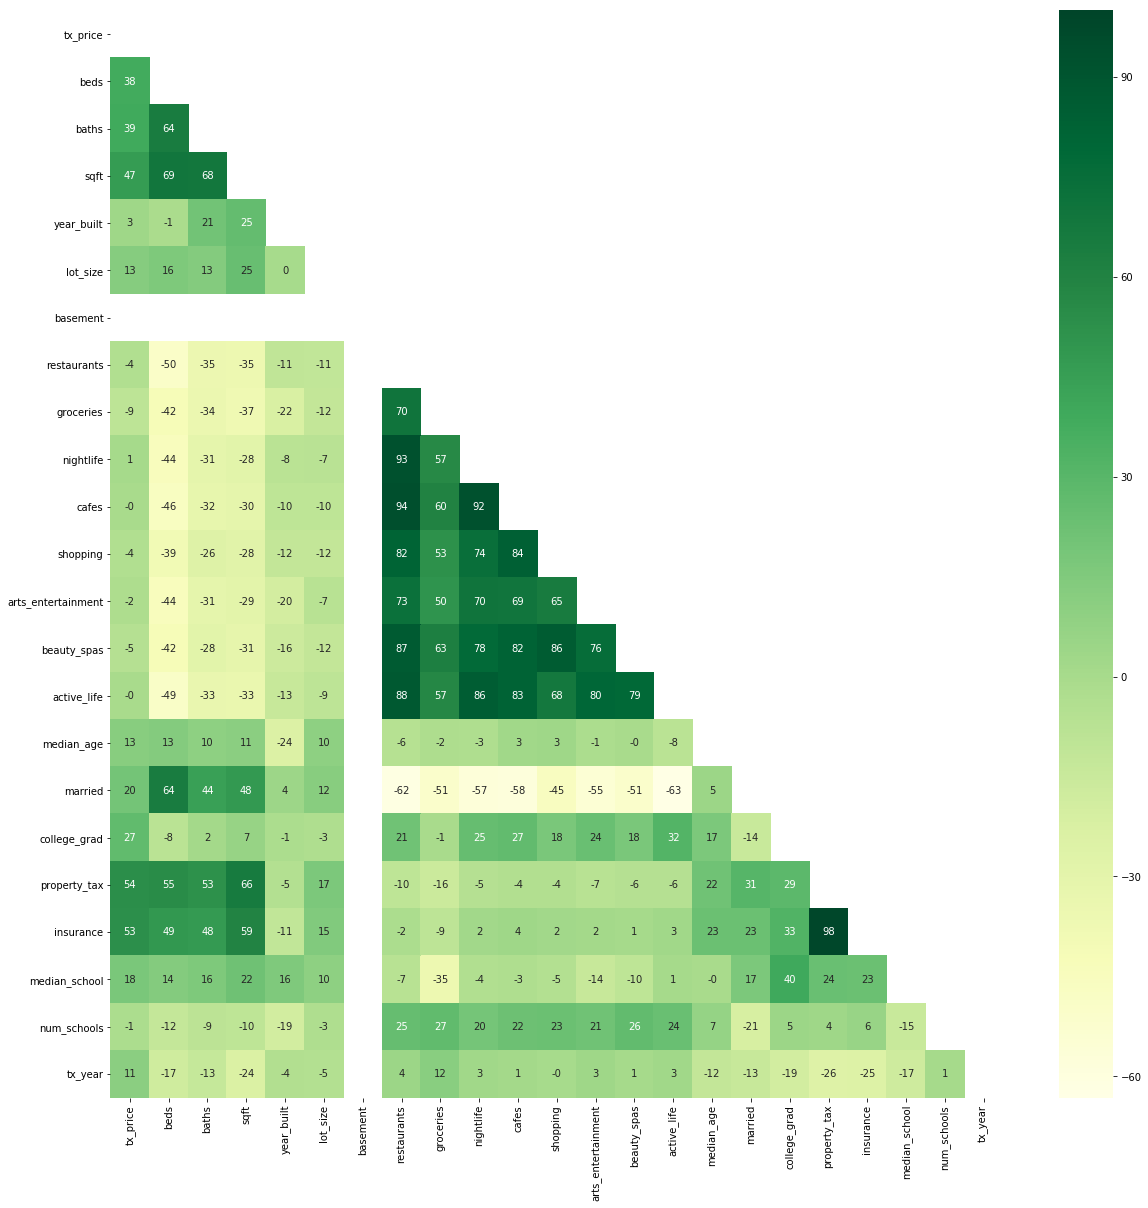

In [13]:
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20, 20))
# Plot heatmap of correlations
sns.heatmap(correlations*100, annot= True, fmt= ".0f", mask= mask, cmap= "YlGn")

#### Data Cleaning

Removing any duplicates

In [14]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(1883, 26)
(1883, 26)


Correcting into the basement values.

In [15]:
df.basement.unique()

array([nan,  1.])

In [16]:
df["basement"] = df.basement.fillna(0)

In [17]:
df.basement.unique()

array([0., 1.])

Grouping Mislabeled Classes

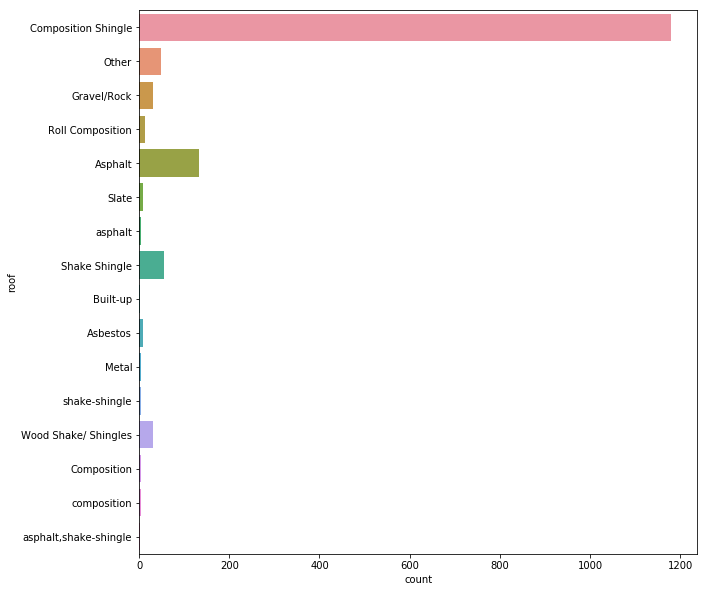

In [18]:
plt.figure(figsize=(10, 10))
sns.countplot(y= "roof", data= df)

In [19]:
df.roof.replace("composition", "Composition", inplace= True)
df.roof.replace("asphalt", "Asphalt", inplace= True)
df.roof.replace(["shake-shingle", "asphalt,shake-shingle"], "Shake Shingle", inplace= True)

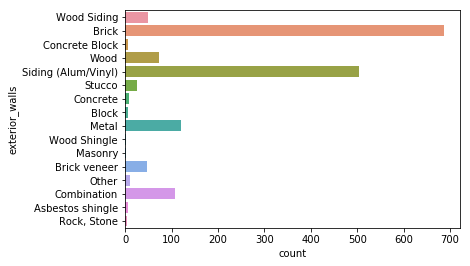

In [20]:
sns.countplot(y="exterior_walls", data= df)

In [21]:
df.exterior_walls.replace(["Rock", "Stone"], "Masonry", inplace= True)
df.exterior_walls.replace(["Concrete", "Block"], "Concrete Block", inplace= True)

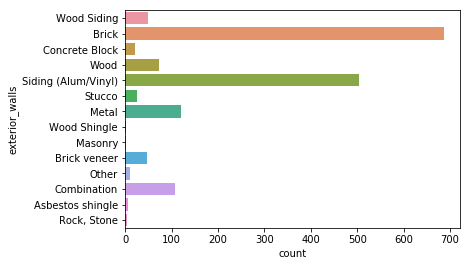

In [22]:
sns.countplot(y="exterior_walls", data= df)

Checking a few violin plots

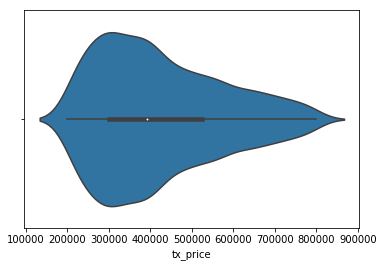

In [23]:
sns.violinplot(x= "tx_price", data= df)

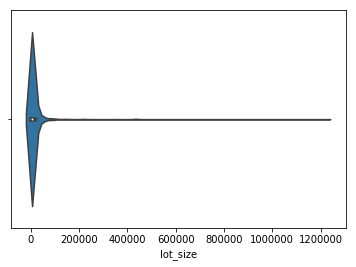

In [24]:
sns.violinplot(x= "lot_size", data= df)
plt.show()

Extremely shady outlier

In [25]:
df.lot_size.sort_values(ascending= False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

In [26]:
#One major outlier which is almost thrice the size, it won't affect predictions. Removing it.
df  = df[df["lot_size"] < 500000]

print(df.shape)

(1882, 26)


Number of NaNs in each categorical feature

In [27]:
df.select_dtypes(include=["object"]).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

Filling Each NaN with "Missing"

In [28]:
# Fill missing categorical values
for col in df.select_dtypes(include= ["object"]):
    df[col] = df[col].fillna("Missing")

Number of NaNs in each numerical feature

In [29]:
df.select_dtypes(exclude=["object"]).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

Good thing they're all zero

### Feature Engineering

In [30]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


##### Domain Specific Features

Flagging properties with 2 bed rooms and 2 baths (generally quite sought after)

In [31]:
df["bed_bath_2"] = ((df.beds == 2) & (df.baths == 2)).astype(int)

In [32]:
df.bed_bath_2.mean()

0.09458023379383634

Accounting for the recession during the years 2010 and 2013

In [33]:
b = df.tx_year.between(2010, 2013).astype(int)
df["recession"] = b

In [34]:
df.recession.mean()

0.2635494155154091

##### Interactive Features

Creating the property age

In [35]:
df["property_age"] = df.tx_year - df.year_built

Sanity Check

In [36]:
print(df.property_age.min())

-8


In [37]:
sum(df.property_age < 0)

19

These cases would occur when the property is sold by the builder before the completion of the construction, and investing companies are not interested in these, hence we're discarding them.

In [38]:
df = df[df.property_age >= 0]

# Print number of rows in remaining dataframe
df.shape

(1863, 29)

A new feature called school_score which is the product of the number of schools with the median qulaity of the schools in the area.

In [39]:
df["school_score"] = df.num_schools * df.median_school

In [40]:
df.school_score.median()

18.0

##### Grouping sparse classses

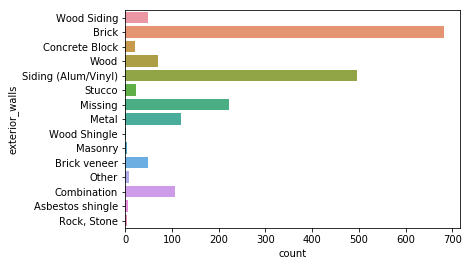

In [41]:
sns.countplot(y="exterior_walls", data= df)

In [42]:
df.exterior_walls.replace(["Wood Siding", "Wood Shingle"], "Wood", inplace= True)

list_classes = ["Stucco", "Other", "Asbestos shingle", "Concrete Block", "Masonry", "Rock, Stone"]
df.exterior_walls.replace(list_classes, "Other", inplace= True)

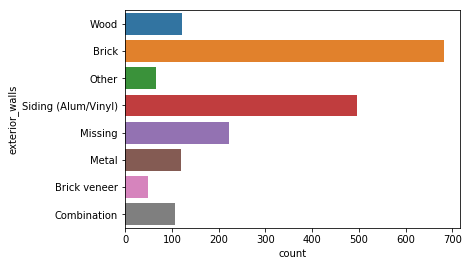

In [43]:
sns.countplot(y= "exterior_walls", data= df)

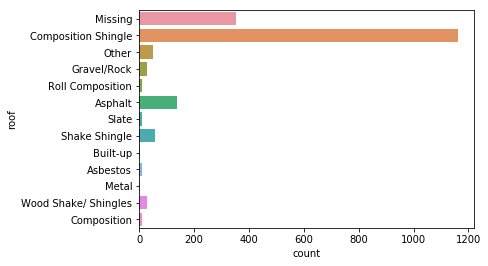

In [44]:
sns.countplot(y= "roof", data= df)

In [45]:
df.roof.replace(["Composition", "Wood Shake/ Shingles"], "Composition Shingle", inplace= True)

list_classes = ["Other", "Gravel/Rock", "Roll Composition", "Slate", "Built-up", "Asbestos", "Metal"]
df.roof.replace(list_classes, "Other", inplace= True)

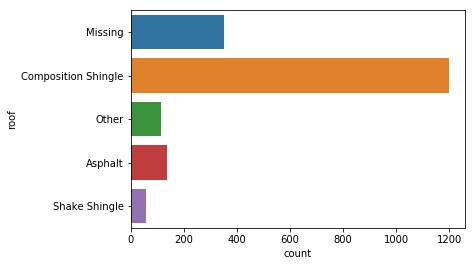

In [46]:
sns.countplot(y= "roof", data= df)

Dummy variables (one hot encoded) for all categorical features.

In [47]:
df = pd.get_dummies(df, columns=["exterior_walls", "roof", "property_type"])
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,bed_bath_2,recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,24.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


Dropping unwanted/duplicate/useless features

In [48]:
df = df.drop(["tx_year", "year_built"], axis= 1)

Saving as the analytical base table, i.e. a dataset ready to be trained on.

In [49]:
df.to_csv("analytical_base_table.csv", index= None)

### Training the Models

In [50]:
# Create separate object for target variable
y = df.tx_price
# Create separate object for input features
X = df.drop("tx_price", axis= 1)

Splitting the data into testing and training set

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1234)

In [52]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1490 373 1490 373


In [53]:
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,bed_bath_2,recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,3.434228,2.579195,2322.785235,12746.659732,0.878523,39.495973,4.388591,5.004698,5.185906,39.561074,3.361745,22.909396,15.770470,38.508725,69.471141,65.012752,464.265772,139.610067,6.510067,2.779195,0.092617,0.265772,24.343624,17.940268,0.359732,0.024161,0.059060,0.065772,0.119463,0.037584,0.268456,0.065772,0.073154,0.643624,0.189262,0.060403,0.033557,0.419463,0.580537
std,1.072914,0.930476,1297.101677,34805.545024,0.326790,46.985862,4.498340,8.441995,7.442707,52.334853,4.693709,25.724463,17.999282,6.615223,19.865080,17.092542,227.249819,71.510905,1.975224,0.517235,0.289993,0.441892,21.209025,6.452059,0.480083,0.153601,0.235817,0.247966,0.324442,0.190252,0.443305,0.247966,0.260477,0.479089,0.391848,0.238311,0.180146,0.493637,0.493637
min,1.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1351.000000,1542.000000,1.000000,6.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,59.000000,53.250000,321.000000,94.000000,5.000000,3.000000,0.000000,0.000000,6.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,1913.500000,6183.000000,1.000000,21.000000,3.000000,2.000000,3.000000,20.000000,2.000000,15.000000,10.000000,38.000000,74.000000,66.000000,426.000000,125.000000,7.000000,3.000000,0.000000,0.000000,20.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.000000,3014.750000,11761.000000,1.000000,56.000000,7.000000,6.000000,6.000000,50.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,572.000000,169.000000,8.000000,3.000000,0.000000,1.000000,38.000000,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,6.000000,7842.000000,436471.000000,1.000000,266.000000,24.000000,53.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,1.000000,1.000000,114.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Creating Model pipelines for an easier workflow

In [54]:
pipelines = {
    "lasso": make_pipeline(StandardScaler(), Lasso(random_state=123)),
    "ridge": make_pipeline(StandardScaler(), Ridge(random_state=123)),
    "enet": make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    "rf": make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    "gb": make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

In [55]:
# Check that we have all 5 algorithms, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


Hyper parameter grid for all the models

In [56]:
# Lasso hyperparameters
lasso_hyperparameters = {
    "lasso__alpha": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}
# Ridge hyperparameters
ridge_hyperparameters = {
    "ridge__alpha": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}
enet_hyperparameters = {
    "elasticnet__alpha": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    "elasticnet__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
}
rf_hyperparameters = {
    "randomforestregressor__n_estimators": [100, 200],
    "randomforestregressor__max_features": ["auto", "sqrt", 0.33]
}
gb_hyperparameters = {
    "gradientboostingregressor__n_estimators": [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}
hyperparameters = {"lasso": lasso_hyperparameters, "ridge": ridge_hyperparameters,
                   "enet": enet_hyperparameters, "rf": rf_hyperparameters,
                   "gb": gb_hyperparameters}

In [57]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


Fitting the models to the training set

In [58]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv= 10, n_jobs= -1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


Each model's best r2 score on the training set

In [59]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.3086275085937654
ridge 0.3166111585985651
enet 0.34287462866389185
rf 0.4815967347888209
gb 0.4869720585739858


Each model's scores on the test set

In [60]:
for name, model in fitted_models.items():
    print(name)
    print("-----------")
    pred = model.predict(X_test)
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
-----------
R^2: 0.40888624716724375
MAE: 85035.54246538793

ridge
-----------
R^2: 0.4093396476329718
MAE: 84978.03564808935

enet
-----------
R^2: 0.4052451373117357
MAE: 86298.63725312549

rf
-----------
R^2: 0.5722509742910005
MAE: 67962.75780160858

gb
-----------
R^2: 0.5410951822821564
MAE: 70601.60664940192



Looking at the actual vs predictions graph

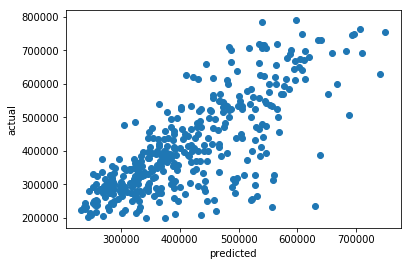

In [61]:
gb_pred = fitted_models['rf'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

They're generally following a 45 degree trend, which means they've fitted well

### Saving the best model

In [62]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

# Finished!